In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
weatherHistory = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Maze/Weather Prediction/weatherHistory.csv")
weatherHistory.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Humidity
0,9.472222,7.388889,14.1197,251,15.8263,0,1015.13,0.89
1,9.355556,7.227778,14.2646,259,15.8263,0,1015.63,0.86
2,9.377778,9.377778,3.9284,204,14.9569,0,1015.94,0.89
3,8.288889,5.944444,14.1036,269,15.8263,0,1016.41,0.83
4,8.755556,6.977778,11.0446,259,15.8263,0,1016.51,0.83


In [ ]:
weatherHistory.describe()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Humidity
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000
mean,11.932678,10.855029,10.810640,187.509232,10.347325,0.0,1003.235956,0.734899
std,9.551546,10.696847,6.913571,107.383428,4.192123,0.0,116.969906,0.195473
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,4.688889,2.311111,5.828200,116.000000,8.339800,0.0,1011.900000,0.600000
50%,12.000000,12.000000,9.965900,180.000000,10.046400,0.0,1016.450000,0.780000
75%,18.838889,18.838889,14.135800,290.000000,14.812000,0.0,1021.090000,0.890000
max,39.905556,39.344444,63.852600,359.000000,16.100000,0.0,1046.380000,1.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


weatherFeatures = ["Temperature (C)","Apparent Temperature (C)","Wind Speed (km/h)",
                   "Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]

X = weatherHistory[weatherFeatures]
y = weatherHistory.Humidity


X_scaled  = preprocessing.scale(X)

# to find if there are non-Linear relationship between the input variables and the output
# poly = PolynomialFeatures(1)
# poly = PolynomialFeatures(2)
# poly = PolynomialFeatures(3)
poly = PolynomialFeatures(7)

X_final = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.10, random_state=42)

In [ ]:
from sklearn import linear_model

# Ridge regression is Linear regression with L2 Regularization
# alpha = Regularization parameter
regr = linear_model.Ridge(alpha = 0.5)
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.22383e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Intercept: ", regr.intercept_)

# print('Coefficients: \n', regr.coef_)
print('The coefficients has a length of:', len(regr.coef_))

# Mean Square Error = average distance the predicted is from the actual value
print('Mean squared error: %.3f' % mean_squared_error(y_test,  y_pred))

# R2 = shows how well the ouput can be predicted by the input (0-1)
print('Coefficient of determination: %.3f' % r2_score(y_test, y_pred))


Intercept:  0.7894705437739148
The coefficients has a length of: 1716
Mean squared error: 0.012
Coefficient of determination: 0.676


---------------------------------------
Polynomial Features of 7 produced the highest R2 score and decrease was noticed from 8, which means the models is beginning to overfit the data. So to prevent overfitting, the regularization parameter (alpha) needs adjustment, but the coefficient is high, making the computational time high.

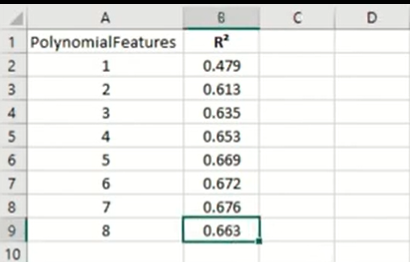


In [ ]:
weatherObs = [[32, 31.4, 44, 344, 13, 1020.33]] # 2D array
weatherObs_scaled = preprocessing.scale(weatherObs)
weatherObs_final = poly.fit_transform(weatherObs_scaled)
y_pred = regr.predict(weatherObs_final)
print(y_pred)

[0.78947054]
